# Tarea01. Métodos kernel para clasificación
## David Montero Loaiza
Para esta tarea llevarás a cabo una clasificación binaria sobre un data set tu elección.

Es preferible que uses un conjunto de datos de tu propio ámbito (estudios, trabajo, investigación, etc.) sobre el cual defines un problema de clasificación binaria. Alternativamente puedes usar un conjunto de datos público. Puedes encontrar data sets usando por ejemplo Google Dataset Search: https://datasetsearch.research.google.com/.

Importante: No uses ninguno de los data sets del UCI Machine Learning Repository, dado que están "sobredocumentados" para este tipo de tareas.
Pasos a seguir:

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, svm
import seaborn as sns

%matplotlib inline

### 1. Elige un conjunto de datos para clasificación binaria. (Es decir, debe incluir etiquetas binarias.)

Se eligió un dataset de kaggle (https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset/data). Este dataset contiene registros de canciones de Spotify en donde la variable objetivo binaria se basa en si la canción ha sido un hit (es decir, si ha entrado en la lista semanal de las 100 canciones más populares Billboard) o si no lo ha sido.

El dataset consta de 19 variables, de las cuales una es la variable objetivo. Se usaron un total de 15 variables predictoras ya que 3 de ellas corresponden a valores alfanuméricos que identifican el nombre de la canción, el artista y el id de Spotify.

Cabe resaltar que, de diferentes décadas, sólo se usó el dataset de la década de los 2000s.

In [115]:
songs = pd.read_csv("C:/Users/Dave Mont/Desktop/Master_of_DataScience/00-datasets/the-spotify-hit-predictor-dataset/dataset-of-00s.csv")

### 2. Visualiza (algunos de) los datos.

Las variables a usar serán:

- danceability
- energy
- key
- loudness
- mode
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo 
- duration_ms
- time_signature
- chorus_hit
- sections

Todas las variables son numéricas y generalmente recorren un rango de 0 a 1, exceptuando algunas excepciones, como loudness, que al representar decibelios recorre el rango de -60 dB a 0 dB. La descripción de cada variable se encuentra en el link proporcionado de kaggle.

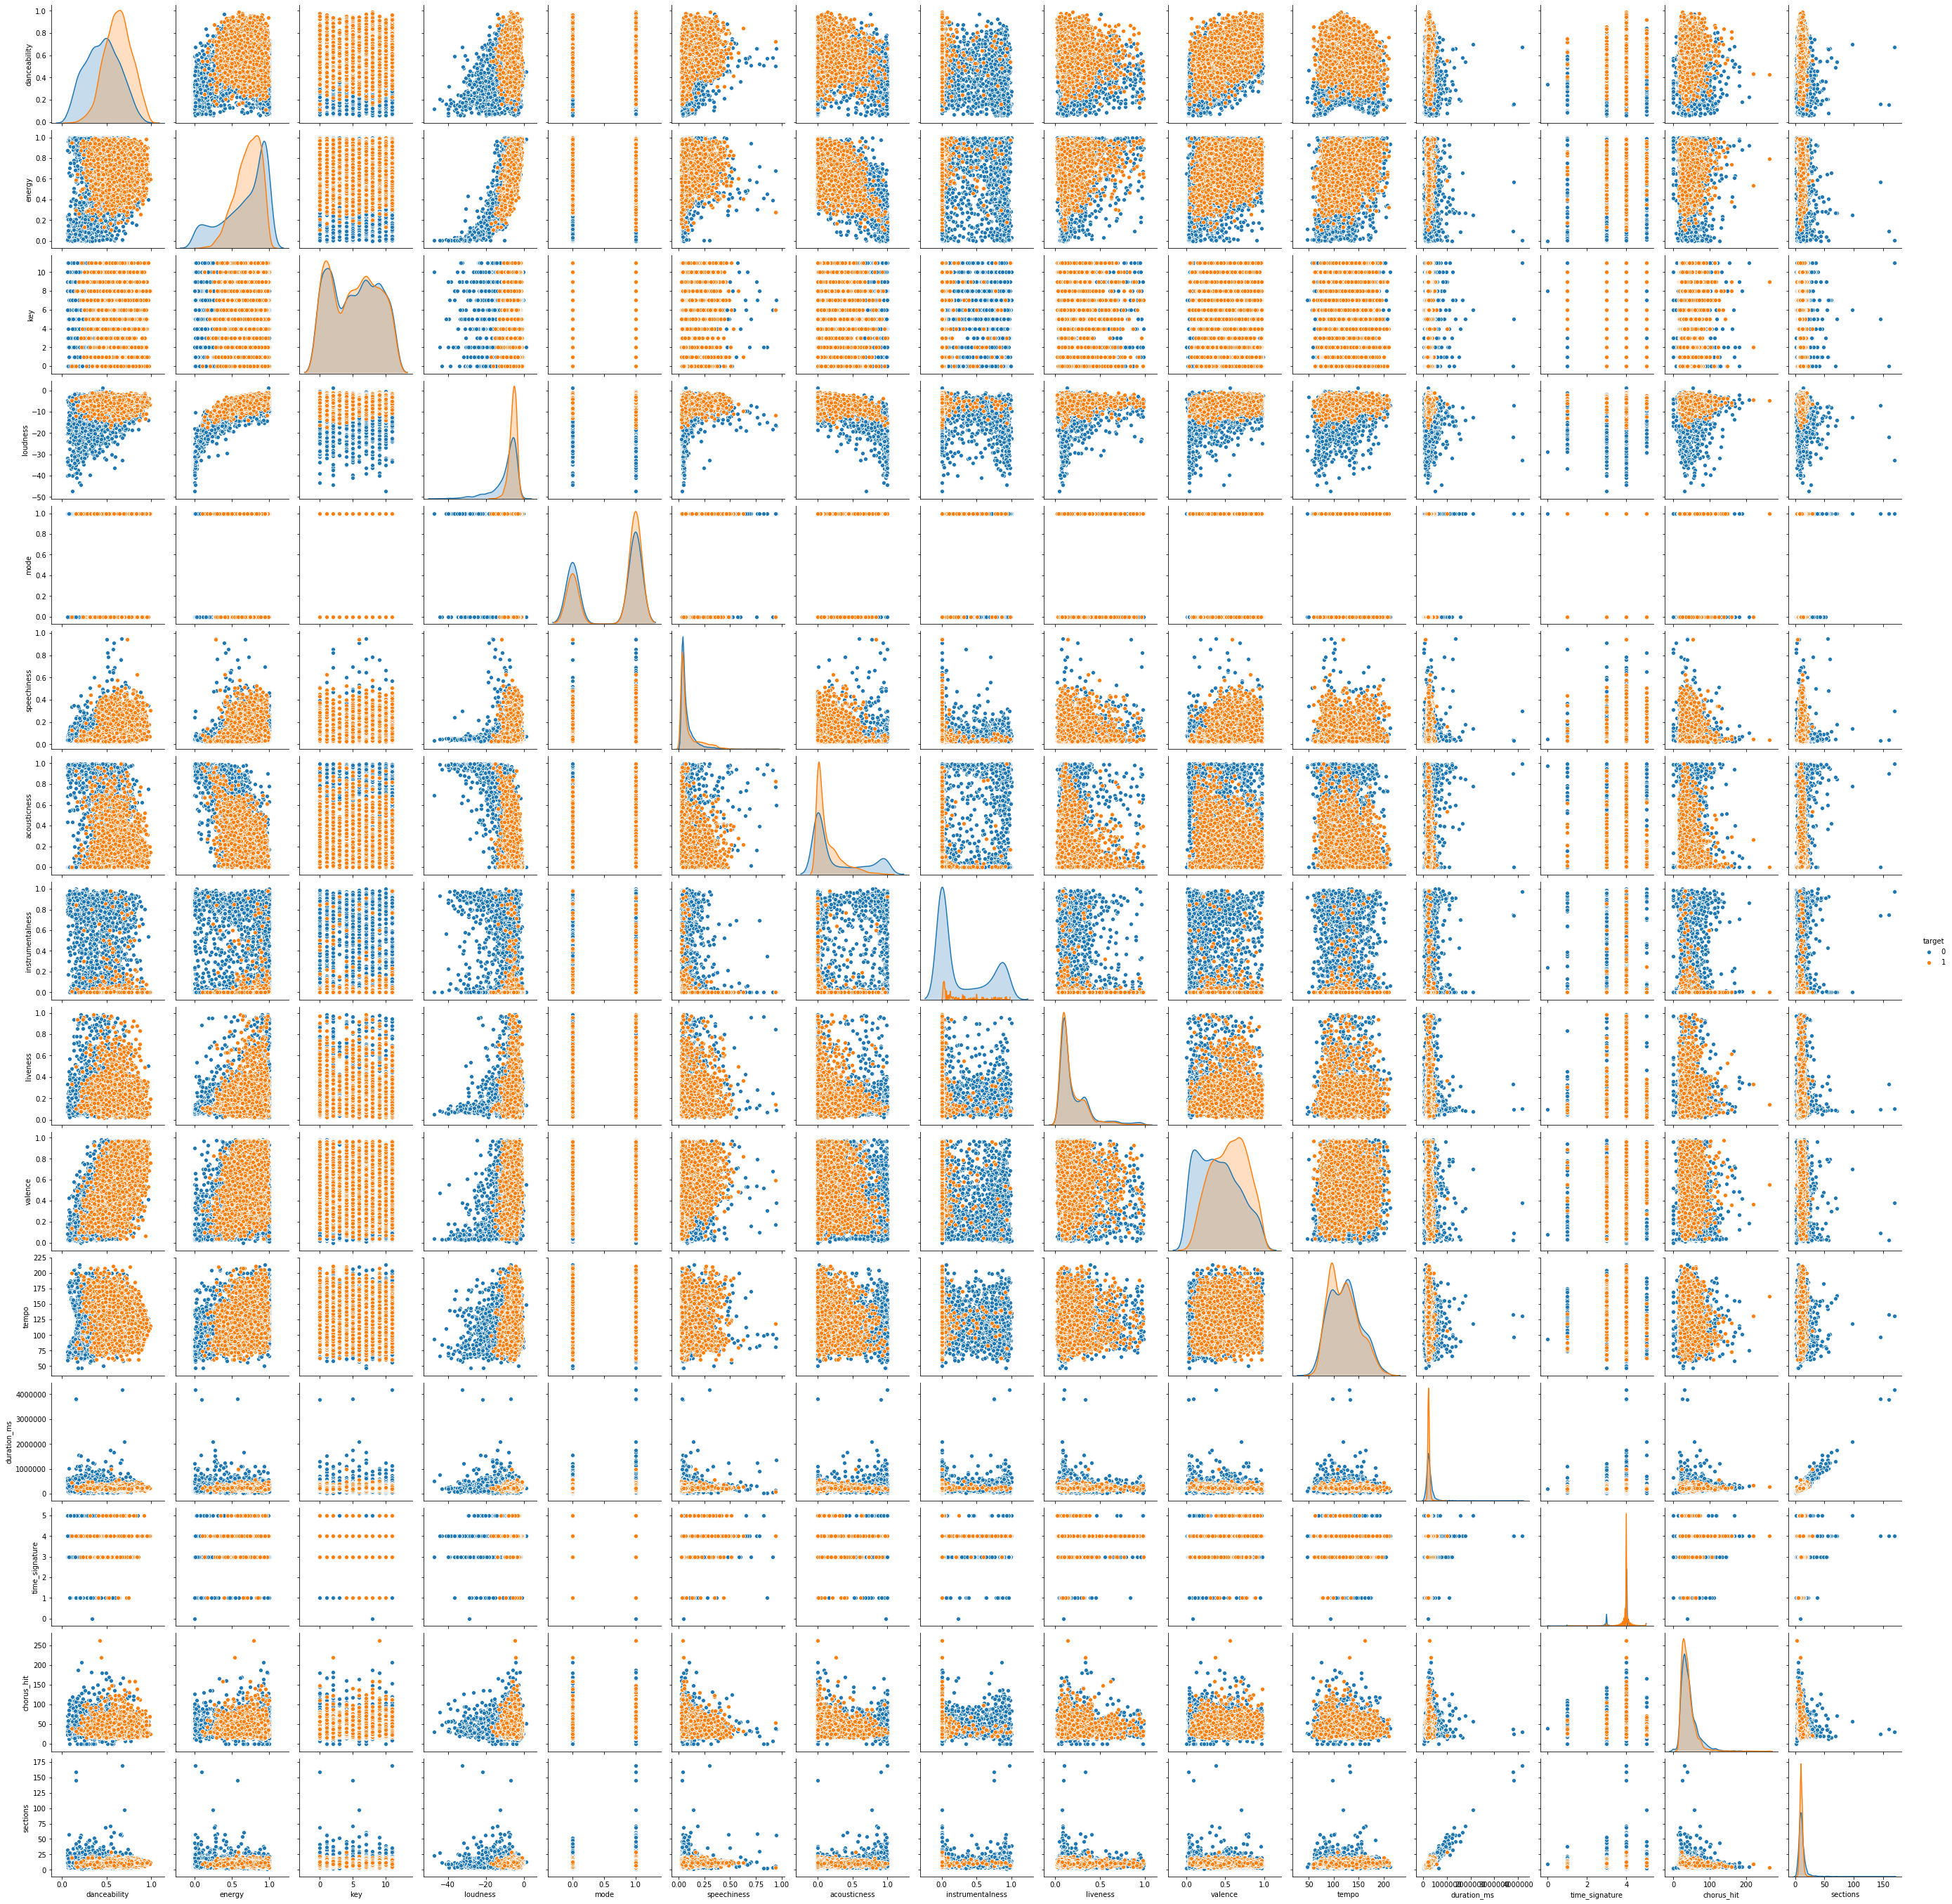

In [126]:
sns.pairplot(songs.iloc[:,3:], hue = 'target')

### 3. Separa los datos en un conjunto de training y otro de test.

In [120]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(songs.iloc[:,3:18],songs["target"],test_size = 0.25,random_state=0)

print('Size of X_train is: ' + str(X_train.shape))
print('Size of X_test is: ' + str(X_test.shape))

Size of X_train is: (4404, 15)
Size of X_test is: (1468, 15)


### 4. Entrena una SVM sobre los datos de training. Busca los parámetros óptimos usando GridSearchCV.

In [121]:
from sklearn.model_selection import GridSearchCV
from time import time

clf = svm.SVC(kernel = "rbf",class_weight = 'balanced')

the_pipeline = Pipeline([('scaler',StandardScaler()),('svm',clf)])

t0 = time()

print("Fitting the classifier to the training set...")

param_grid = {'C': [0.1,1,10,100],'gamma': [1E-10,1E-9,1E-8,1E-7]}

grid = GridSearchCV(clf, param_grid, cv = 4)

grid.fit(X_train,y_train)
clf = grid.best_estimator_

print("Elapsed time: %0.3fs"%(time() - t0))
print("Best estimator found by grid search:")
print(grid.best_params_)

Fitting the classifier to the training set...
Elapsed time: 109.211s
Best estimator found by grid search:
{'C': 0.1, 'gamma': 1e-09}


### 5. Prueba el clasificador sobre los datos de test y reporta el resultado.

In [122]:
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

print('Training accuracy = {0}%'.format(np.round(clf.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf.score(X_test, y_test) * 100, 2)))

              precision    recall  f1-score   support

           0       0.78      0.52      0.63       728
           1       0.65      0.86      0.74       740

    accuracy                           0.69      1468
   macro avg       0.72      0.69      0.68      1468
weighted avg       0.72      0.69      0.68      1468

[[382 346]
 [105 635]]
Training accuracy = 69.28%
Test accuracy = 69.28%


Pon a tu notebook el nombre de fichero "apellido1_apellido2_nombre.ipynb" y entrégalo en formato zip. Si lo ves necesario puedes añadir ficheros adicionales al zip.